#Q2

In [2]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [4]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

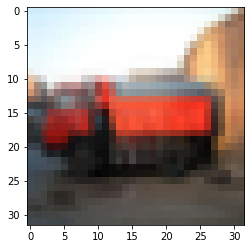

In [5]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [6]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.add(keras.layers.Flatten())
fc_model.add(keras.layers.Dense(6, activation="relu"))
fc_model.add(keras.layers.Dense(6, activation="relu"))
fc_model.add(keras.layers.Dense(10, activation="softmax"))
fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 6)                 18438     
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
Total params: 18,550
Trainable params: 18,550
Non-trainable params: 0
_________________________________________________________________


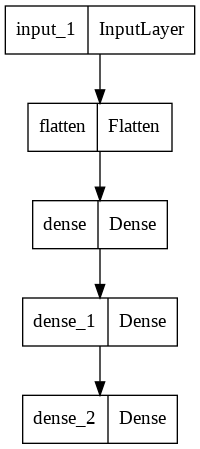

In [8]:
plot_model(fc_model)

In [9]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
# you can use pool layers after Conv layers
Conv_model.add(keras.layers.Conv2D(10, kernel_size=(2, 2), activation="relu"))
Conv_model.add(keras.layers.Conv2D(10, kernel_size=(2, 2), activation="relu"))
Conv_model.add(keras.layers.MaxPooling2D(3))
Conv_model.add(keras.layers.Flatten())
Conv_model.add(keras.layers.Dense(10, activation="softmax"))
Conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 10)        130       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 10)        410       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 10)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 10,550
Trainable params: 10,550
Non-trainable params: 0
__________________________________________________

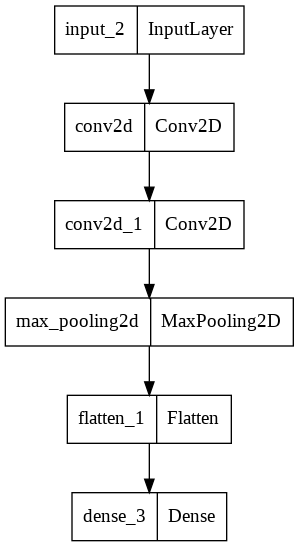

In [10]:
plot_model(Conv_model)

In [11]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 7s 3ms/step - loss: 2.3029 - accuracy: 0.1003
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0997
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0987
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0962
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0978


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.1000


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 12s 3ms/step - loss: 1.5051 - accuracy: 0.4671
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2432 - accuracy: 0.5663
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1619 - accuracy: 0.5959
Epoch 4/5
1563/1563 [==

#Q3

In [ ]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt

In [ ]:
!rm -r sample_data

In [ ]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

In [ ]:
!unzip fruits-360-original-size.zip

## A : complete resize image

In [ ]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [ ]:
def resize_img(img, desired_size = 224):
    # write your code here
    return new_img

In [ ]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

In [ ]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [ ]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [ ]:
# YOU CAN CHANGE IT
EPOCHS = 30

In [ ]:
resnet = tf.keras.models.Sequential()
# Write your code here
resnet.summary()

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [ ]:
resnet.fit(train_generator, epochs=1)

## C : Fine-tune Resnet50 on fruits dataset.

In [ ]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 

fine_tune_resnet.summary()


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [ ]:
fine_tune_resnet.fit(train_generator, epochs=1)

## Test models

In [ ]:
resnet.evaluate(test_generator)

In [ ]:
fine_tune_resnet.evaluate(test_generator)